In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import math 
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
df = pd.read_csv("dataset_final.csv")

In [13]:
# Columnas que se filtran por rango
rango_cols = [
    #'Cantidad_plantas', 
    #'antiguedad', 
    #'m2_totales', 
    #'m2_cubiertos',
    #'expenses', 
    'latitud', 
    'longitud', 
    #'precio_m2_cercano', 
    #'precio_m2_barrio'
]

# Columnas que se filtran por igualdad exacta
igualdad_cols = [
    'dormitorios', 
    #'cocheras', 
    #'baños', 
    'ambientes',
    #'Pileta_sí', 
    #'Apto_credito_sí',
    'vivienda_Departamento', 
    #'vivienda_PH'
]

In [14]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [15]:
y_true = []
y_pred = []
cantidad_filtrados = []

for idx, row in test_df.iterrows():
    cond = pd.Series([True] * len(train_df), index=train_df.index)

    # Filtro por igualdad exacta
    for col in igualdad_cols:
        cond &= (train_df[col] == row[col])

    # Filtro por tolerancia
    min_factor = 0.9
    max_factor = 1.1
    for col in rango_cols:
        lower = min_factor * row[col]
        upper = max_factor * row[col]
        cond &= (train_df[col] >= min(lower, upper)) & (train_df[col] <= max(lower, upper))

    similares = train_df[cond]
    cantidad_filtrados.append(len(similares))

    if len(similares) > 0:
        pred = similares['price'].mean()
    else:
        pred = train_df['price'].mean()

    y_true.append(row['price'])
    y_pred.append(pred)

# Estilo oscuro como el de tu ejemplo
y_true = np.expm1(y_true)
y_pred = np.expm1(y_pred)

In [16]:
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)

print("Baseline")
print(f"   📉 MAE: {mae:.2f}")
print(f"   📊 MSE: {mse:.2f}")
print(f"   💰 RMSE: {rmse:.2f}")
print(f"   📈 R²: {r2:.2f}")
print(f"   🔍 Promedio de propiedades filtradas por predicción: {np.mean(cantidad_filtrados):.2f}")


Baseline
   📉 MAE: 64165.71
   📊 MSE: 8088594282.91
   💰 RMSE: 89936.61
   📈 R²: 0.19
   🔍 Promedio de propiedades filtradas por predicción: 20.56


/home/gaston/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


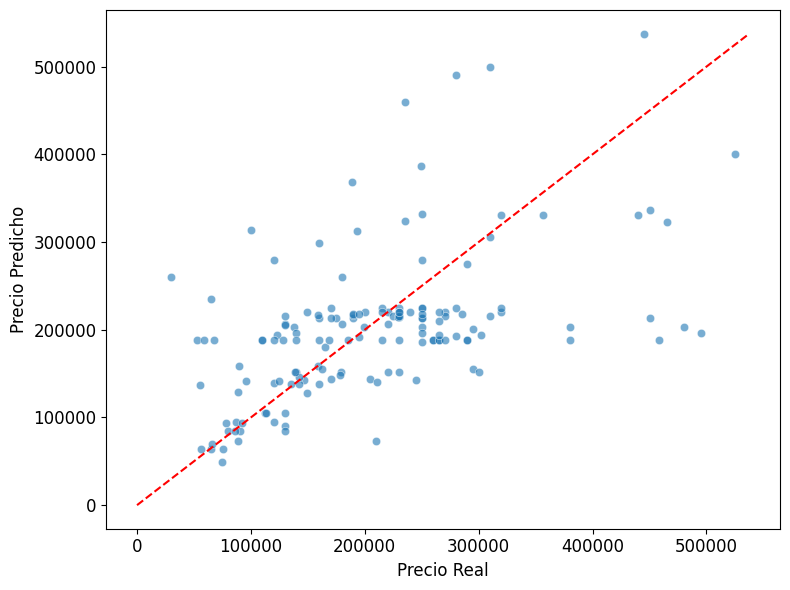

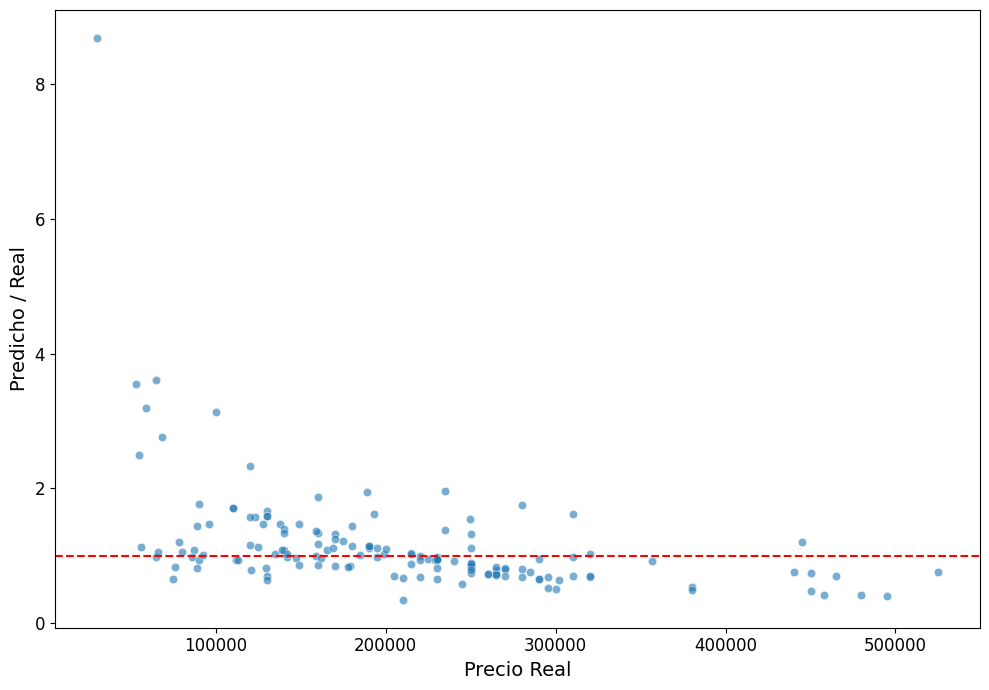

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
max_val = max(max(y_true), max(y_pred))
plt.plot([0, max_val], [0, max_val], 'r--', linewidth=1.5)
plt.xlabel("Precio Real", fontsize=12)
plt.ylabel("Precio Predicho", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.gca().patch.set_linewidth(0)
plt.gcf().patch.set_linewidth(0)
plt.tight_layout()
plt.show()


# Asegurarse de tener listas en formato numpy
y_true_arr = np.array(y_true)
y_pred_arr = np.array(y_pred)

ratio = y_pred_arr / np.where(y_true_arr == 0, np.nan, y_true_arr)

# Crear figura
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_true_arr, y=ratio, alpha=0.6)
plt.axhline(1, color='red', linestyle='--', linewidth=1.5)
plt.xlabel("Precio Real", fontsize=14)
plt.ylabel("Predicho / Real", fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()